# Tree-Structured Parzen Estimators method

What is the Tree-Structured Parzen Estimator method?

The Tree-Structured Parzen Estimator (TPE) method is a powerful and intuitive approach for optimizing functions, often used in the process of hyperparameter tuning for ML algorithms to get the best performance. TPE combines the principles of Bayesian optimization and tree-based search, making it an efficient and effective method for finding the best set of hyperparameters for a given ML model.

At its core, TPE operates by modeling the relationship between hyperparameters and the performance of an ML model as a probabilistic distribution. It divides the search space into two parts: a good space and a bad space. The goal is to allocate more search effort to the good space, where better hyperparameter combinations are likely to be fou

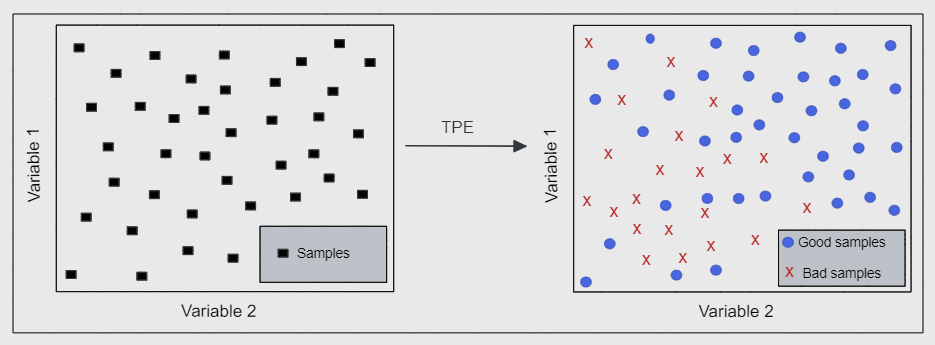

Initially, TPE lacks awareness of the good and bad distributions, and this is the phase where exploration occurs. TPE begins by randomly sampling a set of configurations (hyperparameter values) and evaluating their performance. Based on the performance, the configurations are labeled as good or bad.

TPE maintains two probability distributions:

The hyperparameters that have resulted in better model performance.

The hyperparameters that have led to worse performance.

These distributions are updated iteratively as TPE explores different hyperparameter configurations. The idea is to sample new hyperparameters from the distribution of the good space to increase the chances of finding an optimal set that will provide better ML model perforBenefits of the TPE method : 

One of the key advantages of TPE is its ability to adaptively allocate resources. It intelligently balances the exploration of new hyperparameters with the exploitation of promising ones, improving search efficiency. Additionally, TPE is relatively easy to implement and has been shown to outperform traditional grid and random search methods in terms of finding optimal hyperparameters.

TPE provides a clever and efficient approach to hyperparameter tuning by modeling the search space as probability distributions. TPE focuses on the most promising configurations, providing a powerful tool for optimizing ML models. This helps practitioners to achieve better performance with less computational effort.mance.nd.




## Import important packages
First, we import important Python packages that will do the following tasks:

- Load the dataset.
- Clean the dataset.
- Process the dataset using feature engineering techniques.
- Create and train machine learning model (K-nearest neighbors) with default hyperparameters.
- Check machine learning model performance.
- Implement the Tree-Structured Parzen Estimators method using the Optuna library.
- Identify the combination of hyperparameters that provide the best results.



In [1]:
# Import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")
# Seeding
np.random.seed(123)


## Load the dataset
We will use pandas to load the dataset from the data folder. The name of the dataset is
loan_data.csv.

In [2]:
# Load data

data_path = "loan_data.csv"

data = pd.read_csv(data_path)

Let’s see the first five rows of the dataset using the head() method from pandas.

In [3]:
# Show the top five rows of data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


As we can see, the dataset has 13 columns.

- Loan_ID: Unique loan ID
- Gender: Male/Female 
- Married: Applicant married (Y/N)
- Dependents: Number of dependents
- Education: Applicant education (Graduate/Undergraduate)
- Self_Employed: Self-employed (Y/N)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Co-applicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of the loan in months
- Credit_History: Credit history meets guidelines
- Property_Area: Urban/Semi-Urban/Rural
- Loan_Status: Loan approved (Y/N)

The shape method from pandas will let us know the total number of rows and columns available in
the dataset.

In [4]:
# Check the shape of the data
data.shape

(614, 13)

The dataset has 614 loan data.

The pandas method called info() provides more details about each column presented in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The information above shows that the dataset has columns with different data types, such as object/string, integers, and float.

## Check missing values

It is important to clean the dataset by checking if it has any missing values before starting to
train the machine learning model.

The following code will provide a total of missing values for each column presented in the dataset.

In [6]:
# Check the missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The output shows that our dataset has some missing values in different columns.

First, let’s convert some values in the Loan_Status and Dependents columns into numerical values.

In [7]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [8]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Replace with numerical values
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

For columns with object data type, we use the mode() function from pandas to identify the most common value in that particular column and insert the identified value into all missing points in the column.

For columns with numerical data type(int64 or float64), we use the median() function from pandas to find the median value in that particular column and insert the identified value into all missing points in the column.

In [10]:
# Handle missing data 
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

We drop the ID column because it is not used in the process of training a machine learning model.

In [11]:
# Drop ID column
data = data.drop('Loan_ID',axis=1)

Let's check again if all missing values in the dataset have been handled.

In [12]:
# Check missing values in the data
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Finally, the dataset does not have any missing values.

## How to evaluate class distribution
Identifying the class distribution helps us to know if the dataset is balanced or not. The value_counts() method from the pandas package can evaluate the class distribution by showing the total number of each unique value in the target column.

In [13]:
# Evaluate the Loan_status column
data.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

This shows that in this dataset, the distribution in the target column is unequal. There are more 1 values (Yes) than 0 values (No).

## Split data into feature and target variables

The next step is to split data into feature and target variables.

In [14]:
#Split features and target from the data
X = data.drop('Loan_Status',axis = 1)
y = data.Loan_Status.values

The target is the Loan_Status variable.

## Preprocess the features

However, before we train the machine learning model, we need to transform our features into numerical values so that the machine learning model can understand the data. In this case, we will use: 

- The **MinMaxScaler()** method from scikit-learn to scale the minimum and maximum values to be 0 and 1, respectively, for the columns with int64 and float64 data types.
- The **get_dummies()** method from pandas to convert categorical variables into indicator variables. These variables will have a value of 0 or 1. This method can automatically identify categorical variables and convert them into indicator variables with a value of 0 or 1.

In [15]:
#Scale the numerical columns with MinMaxScaler() 
X["ApplicantIncome"] = MinMaxScaler().fit_transform(X["ApplicantIncome"].values.reshape(-1,1))
X["LoanAmount"] = MinMaxScaler().fit_transform(X["LoanAmount"].values.reshape(-1,1))
X["CoapplicantIncome"] = MinMaxScaler().fit_transform(X["CoapplicantIncome"].values.reshape(-1,1))
X["Loan_Amount_Term"] = MinMaxScaler().fit_transform(X["Loan_Amount_Term"].values.reshape(-1,1))

In [16]:
#Change categorical features to numerical with get_dummies() 
X = pd.get_dummies(X)

#Convert the DataFrame to a NumPy array. 
X = X.to_numpy()

## Train a base machine learning model

In this example, we will train the K-nearest neighbors algorithm with default hyperparameter values using the cross-validation technique to check the model performance.


In [41]:
# Create a classifier
knn_classifier = KNeighborsClassifier()

We will use the `cross_val_score()` method from scikit-learn to train and evaluate a machine learning model across numerous folds of the dataset. This cross-validation method provides a more comprehensive understanding of the model’s performance across the entire dataset than a simple train/test split.


To use `cross_val_score()` method, we need to define the following parameters:

1. `estimator`: The machine learning model object to fit the data
2. `X`: The data/features to fit the machine learning model on
3. `y`: The target variable of the model classification or regression tasks
4. `scoring`: The evaluation error metric to use
5. `cv`: The number of splits to use (example 3).


The main goal is to prevent model over-fitting and promote model generalization.


Note: The machine learning model’s performance will be evaluated using the f1_score evaluation metric. We use f1_score because we have an unequal number of classes in the Loan_Status variable.

In [42]:
# Define a function to evaluate f1_score
def f1_scorer(estimator, X, y):
    y_preds = estimator.predict(X)
    f1 = f1_score(y, y_preds, average='macro')
    return round(f1, 4)


# Implement and run the cross-val-score method
score = cross_val_score(estimator=knn_classifier,
                        X=X,
                        y=y,
                        scoring=f1_scorer,
                        cv=3,
                        n_jobs=-1)

# Print the mean score
print(round(score.mean(), 4))

0.5671


The mean score of our machine learning model is 0.5671, we need to improve the model performance in order to produce better results.

## Implement the Tree-Structured Parzen Estimators method

Since we know how well the machine learning model works with the default hyperparameter values, we can try to improve the model’s performance by using the Tree-Structured Parzen estimators method to find the combination of hyperparameter values that can give an F1-score of more than 0.5671.

The K-nearest neighbors algorithm has multiple hyperparameters, as shown below ([see the documentation](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/neighbors/_classification.py#L24)):

`KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)` 

However, for this example, we will use the following important hyperparameters to find the right combination of their values to get an F1-score greater than 0.5671.

- `n_neighbors`: The number of neighbors to use
- `weights`: The weight function used in prediction
- `algorithm`: The algorithm used to compute the nearest neighbors
- `leaf_size`: The leaf size passed to BallTree or KDTree

To implement the Tree-Structured Parzen Estimators method using the Optuna library, we need to define the following important parameters.

- `Search space`: The list of parameters names as variable names and
distributions or lists of parameters to try (trial). This can be a categorical, float, or integer parameter.
- `objective function`: The function used to evaluate a given configuration of hyperparameters


In [43]:
# Import Optuna
import optuna
from optuna.samplers import TPESampler


# Define the search space and the objective function
def objective(trial):
    # Define the search space
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithms = trial.suggest_categorical(
        'algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    n_neighbors = trial.suggest_int('n_neighbors', 5, 30, 1)
    leaf_size = trial.suggest_int('leaf_size', 20, 60)

    # Configure the model with specific hyperparameters
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                               weights=weights,
                               algorithm=algorithms,
                               leaf_size=leaf_size)
    #Train the model and calculate the score
    score = cross_val_score(clf, X, y, scoring=f1_scorer).mean()
    score = round(score, 4)

    # Return the score
    return score

Note: We need to read the algorithm documentation to understand the function of each
hyperparameter and types of values we can add into the search space. For the K-nearest neighbors algorithm, we can read [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Our objective function uses cross-validation techniques to evaluate the performance of the K-nearest neighbors algorithm and finally calculate the average performance score.

Finally, we use the `create_study()` method to manage and perform the optimization task. We need to provide the following parameters to the method.
- Name of the study
- The direction of the optimization process (Maximize or minimize)
- The optimization method to use.


In [44]:
# Create a study object 

study = optuna.create_study(study_name="KNN_optimization",
                            direction="maximize",
                            sampler=TPESampler())

[I 2023-08-07 23:09:51,828] A new study created in memory with name: KNN_optimization


As shown in the above block of code, the name of the study object is called `KNN_optimization`. The direction of the optimization process is `maximize`. This means that the higher the score of the machine learning model the better the performance. We also define the optimization method to use, which is `TPESampler()`.

The last step is to pass the objective function created and the number of trials to the `optimize()` method of the study object.

In this case, the number of trials is 10.

In [45]:
# Pass the objective function to method optimize() and number of trials

study.optimize(objective, n_trials=10)

[I 2023-08-07 23:09:51,874] Trial 0 finished with value: 0.6585 and parameters: {'weights': 'distance', 'algorithm': 'auto', 'n_neighbors': 8, 'leaf_size': 36}. Best is trial 0 with value: 0.6585.
[I 2023-08-07 23:09:51,919] Trial 1 finished with value: 0.5473 and parameters: {'weights': 'uniform', 'algorithm': 'auto', 'n_neighbors': 9, 'leaf_size': 33}. Best is trial 0 with value: 0.6585.
[I 2023-08-07 23:09:51,979] Trial 2 finished with value: 0.5726 and parameters: {'weights': 'uniform', 'algorithm': 'kd_tree', 'n_neighbors': 12, 'leaf_size': 41}. Best is trial 0 with value: 0.6585.
[I 2023-08-07 23:09:52,011] Trial 3 finished with value: 0.6588 and parameters: {'weights': 'distance', 'algorithm': 'auto', 'n_neighbors': 5, 'leaf_size': 44}. Best is trial 3 with value: 0.6588.
[I 2023-08-07 23:09:52,048] Trial 4 finished with value: 0.6262 and parameters: {'weights': 'distance', 'algorithm': 'auto', 'n_neighbors': 23, 'leaf_size': 50}. Best is trial 3 with value: 0.6588.
[I 2023-08-0

Note: The time it takes to run the search could range anywhere from a few minutes to hours, depending on the scope of the search space, dataset size, and the processing power of the hardware.

At the end of the optimization, we can use the following attributes to access all the results.

- `best_params`: The combination of hyperparameters that gave the best results
- `best_value`: The function returns the best objective value in the study, which indicates the best performance results

In [46]:
# Show the best combination of hyperparameters
print("best combination of hyperparameters:", study.best_params)

best combination of hyperparameters: {'weights': 'distance', 'algorithm': 'auto', 'n_neighbors': 5, 'leaf_size': 44}


This shows that when the hyperparameters have the above values as follows:

- `weights` = 'distance'
- `n_neighbors` = 5
- `leaf_size` = 44
- `algorithm` = 'auto'

These will produce the best result based on the defined search space.

In [47]:
# Show the best score after performing the Tree-Structured Parzen Estimators method
print("Best score:", abs(study.best_value))

Best score: 0.6588


The best score is an F1-score of 0.6588 which is greater than 0.5671.

As we can see the performance of the machine learning model has increased compared to the machine learning model trained with default hyperparameters.

It is recommended to add or change more either options or values of hyperparameters on the **search space(trials)** —number of trials in the `optimize()` method—and then try to
rerun it. It may be able to provide better results than what we have found.

# Advantages of the TPE method

Efficient exploration: TPE efficiently explores the hyperparameter search space. Unlike grid search or random search, TPE focuses on promising regions of the hyperparameter space, adaptively refining its search as it gathers more information about the objective function. This targeted exploration leads to faster convergence toward optimal hyperparameters

Automated optimization: TPE automates the process of hyperparameter optimization. This task can be time-consuming and requires domain expertise. TPE only requires setting the range and type of each hyperparameter and defining the objective function, and the algorithm handles the rest.

Balancing considerations: TPE employs surrogate models to capture the trade-offs between different hyperparameter configurations effectively. It maintains two distinct probability distributions, one for promising configurations that improve the objective function and another for unpromising ones. Therefore, TPE can make informed decisions about which combination of hyperparameters to sample next, balancing exploration and exploitation. This ability to make informed choices often results in a higher likelihood of finding optimal hyperparameters compared to the random search metho

# Disadvantages of the TPE method

Computational complexity: TPE can be computationally intensive, especially when the search space is large and the objective function evaluations are expensive. It requires maintaining a tree structure to model the probability distributions of hyperparameters. As more samples are collected, the tree can become quite large. This can lead to increased memory usage and longer optimization times

Limited exploration in high dimensions: TPE relies on the assumption that the objective function is relatively smooth and can be effectively partitioned into two subspaces, one with better results (good space) and the other with worse results (bad space). In high-dimensional spaces, it becomes increasingly challenging to find these partitions, leading to limited exploration. The algorithm might struggle to allocate resources efficiently when the dimensionality of the hyperparameter search space is high.
.d..